In [3]:
%Feng Mingxuan 2201212231 HW7 

%matplotlib inline
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())       

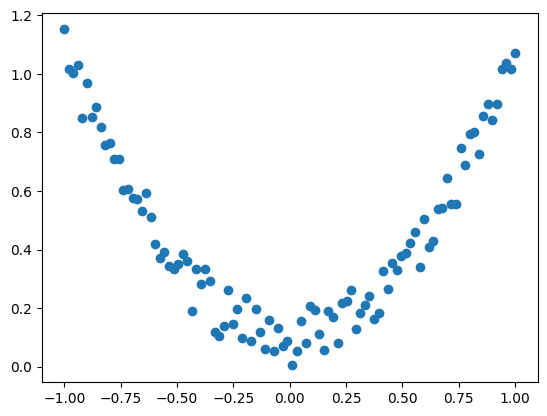

In [4]:
plt.scatter(x.numpy(), y.numpy())

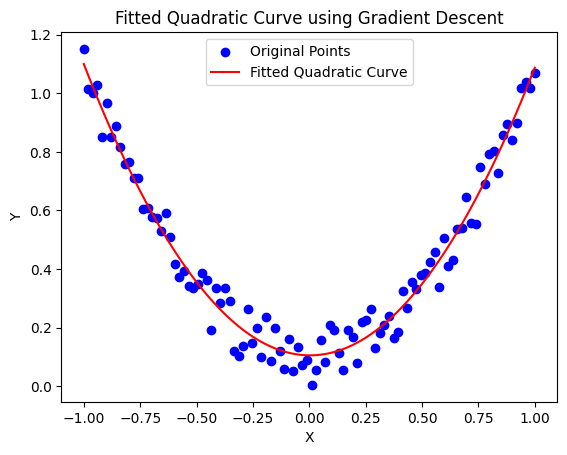

In [5]:
a = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)
c = torch.rand(1, requires_grad=True)

# Learning rate and number of iterations
lr = 0.1
num_iterations = 1000

# Gradient Descent
for epoch in range(num_iterations):
    # Quadratic curve model
    quadratic_curve = a * x.pow(2) + b * x + c

    # Mean Squared Error (MSE) loss
    loss = F.mse_loss(quadratic_curve, y)

    # Backward pass
    loss.backward()

    # Update parameters using gradient descent
    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad
        c -= lr * c.grad

        # Zero gradients for the next iteration
        a.grad.zero_()
        b.grad.zero_()
        c.grad.zero_()

# Plot the original points and the fitted quadratic curve
plt.scatter(x.numpy(), y.numpy(), color='blue', label='Original Points')
plt.plot(x.numpy(), quadratic_curve.detach().numpy(), color='red', label='Fitted Quadratic Curve')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitted Quadratic Curve using Gradient Descent')
plt.show()